# Handling missing values for iter 1

Select only iter 1 features and drow missing values heatmap
features_iter1 = 
[

]

Packages 

In [1]:
import os
#Change current directory
os.chdir ('/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn')
#Check the current directory
os.getcwd()

'/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn'

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
from scipy import stats
from pyspark.sql import SparkSession
from pyspark.sql import functions
import yaml 

from sklearn.model_selection import train_test_split 

from src.components.data_ingestion import get_feature_tables_from_impala, get_churn_target 
from src.components.data_structuring import structuringPipeline
from src.eda import utils
from src.eda.utils import columnsFamilies

In [3]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"

In [4]:
#Reload modules in case a change has occured
#import importlib
#from src.components import data_ingestion, data_structuring
#importlib.reload(data_ingestion)
#importlib.reload(data_structuring)

### Loding data

--------------------

In [5]:
#Loading data
data_date = "2024-10-15"
df_train = pd.read_csv(f"{data_path}/{data_date}_df_train_fillna_0.csv", index_col = 0, dtype= {"dn": "string"})
df_dev = pd.read_csv(f"{data_path}/{data_date}_df_dev_fillna_0.csv", index_col = 0, dtype= {"dn": "string"})
df_test = pd.read_csv(f"{data_path}/{data_date}_df_test_fillna_0.csv",  index_col = 0, dtype= {"dn": "string"})

In [15]:
#Quick check
print (f"df_train shape :{df_train.shape}")
print (f"df_dev shape: {df_dev.shape}")
print (f"df_test shape: {df_test.shape}")
print (f"Column dn's type: {df_train.dn.dtype}")

df_train shape :(86992, 1092)
df_dev shape: (14563, 1092)
df_test shape: (5839, 1092)
Column dn's type: string


--------------

In [14]:
df_train_columns =  pd.DataFrame({"columns": df_train.columns.to_list()})
df_train_columns.to_csv(f"{artifacts_path}/{date_time}_list_of_df_columns_after_null_columns_deleted.csv")

### Import feature names

In [29]:
with open(f"{artifacts_path}/2024-10-16_feature_names_iter1.txt") as f:
    feature_names = f.read()
# Séparer les colonnes en utilisant la virgule comme délimiteur
feature_names_iter1 = feature_names.split(',')
feature_names_iter1 = [col.strip() for col in feature_names_iter1]
feature_names_iter1[0:7]

['dn',
 'gamme',
 'churn_segment',
 'churn_date',
 'activation_bscs_date',
 'id_date',
 'complaints_complaints_complaint_status_resolu_duration_nb_1m']

### Handling missing values 

In [31]:
#From df take only feature in iter 1
df_train = df_train[feature_names_iter1]
df_dev = df_dev[feature_names_iter1]
df_test = df_test[feature_names_iter1]
print (f"df_train shape: {df_train.shape}")
print (f"df_dev shape: {df_dev.shape}")
print (f"df_test shape: {df_test.shape}")

df_train shape: (86992, 537)
df_dev shape: (14563, 537)
df_test shape: (5839, 537)


#### Replace all 0 with nan values 

In [36]:
#Get numerical columns from df
df_numerical_columns = df_train.dtypes[df_train.dtypes != "object" ].index.to_list()
df_numerical_columns = [ column for column in df_numerical_columns if column not in ["dn", "dn_group_id", "churn" ]]

In [37]:
#Repalce 0 with nan values 
print (f"Are there any 0 values in df_train : {(df_train[df_numerical_columns] == 0).any().any()} ")
df_train[df_numerical_columns] = df_train[df_numerical_columns].replace(0, np.nan)
print (f"Are still there any 0 values in df_train after transforming 0 values into nan : {(df_train[df_numerical_columns] == 0).any().any()} ")
print ("------------------------------------------------------------------------------------------------------")
print (f"Are there any 0 values in df_dev : {(df_dev[df_numerical_columns] == 0).any().any()} ")
df_dev[df_numerical_columns] = df_dev[df_numerical_columns].replace(0, np.nan)
print (f"Are still there any 0 values in df_dev after transforming 0 values into nan : {(df_dev[df_numerical_columns] == 0).any().any()} ")
print ("------------------------------------------------------------------------------------------------------")
print (f"Are there any 0 values in df_test : {(df_test[df_numerical_columns] == 0).any().any()} ")
df_test[df_numerical_columns] = df_test[df_numerical_columns].replace(0, np.nan)
print (f"Are still there any 0 values in df_test after transforming 0 values into nan : {(df_test[df_numerical_columns] == 0).any().any()} ")

Are there any 0 values in df_train : True 
Are still there any 0 values in df_train after transforming 0 values into nan : False 
------------------------------------------------------------------------------------------------------
Are there any 0 values in df_dev : True 
Are still there any 0 values in df_dev after transforming 0 values into nan : False 
------------------------------------------------------------------------------------------------------
Are there any 0 values in df_test : True 
Are still there any 0 values in df_test after transforming 0 values into nan : False 


#### Heatmap of missing values 

In [39]:
missing_values_matrix = df_train.isna()

Missing values in white, other values in black


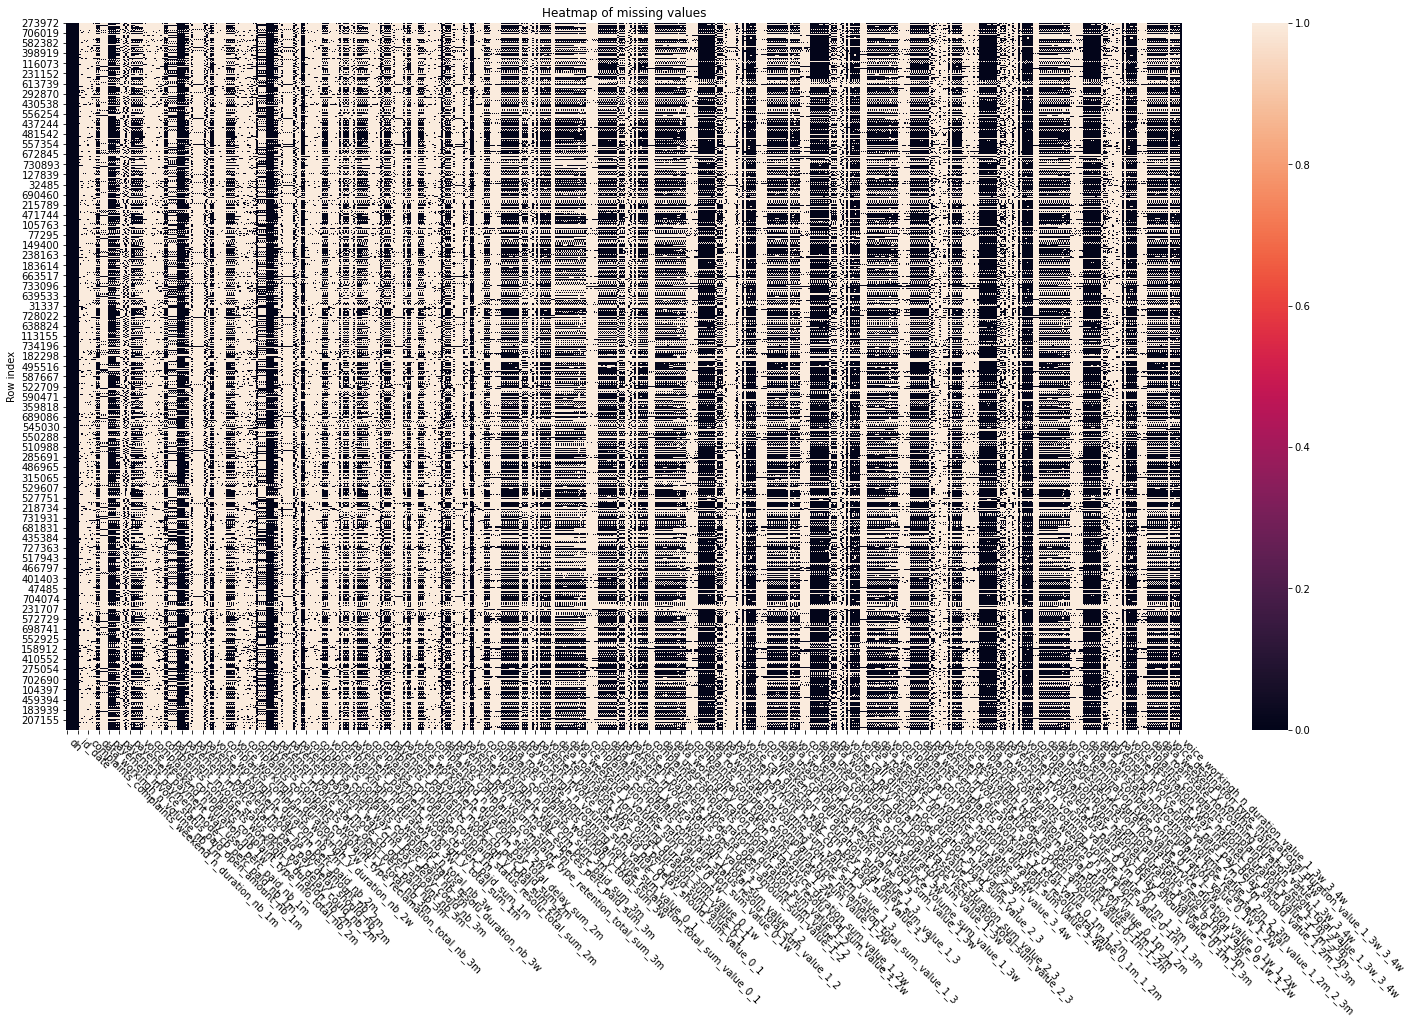

In [40]:
#Heatmap of missing values
utils.vis_missing_values_heatmap(missing_values_matrix)

#### Fill all missing values with 0

**df_train**

In [41]:
print (f"Total number of missing values in df : {df_train.isna().sum().sum()}")
df_train = df_train.fillna(0)
print (f"Total number of missing values in df_train after filling all nan with 0 : {df_train.isna().sum().sum()}")

Total number of missing values in df : 27316320
Total number of missing values in df_train after filling all nan with 0 : 0


**df_dev**

In [42]:
print (f"Total number of missing values in df : {df_dev.isna().sum().sum()}")
df_dev = df_dev.fillna(0)
print (f"Total number of missing values in df_dev after filling all nan with 0 : {df_dev.isna().sum().sum()}")

Total number of missing values in df : 4571070
Total number of missing values in df_dev after filling all nan with 0 : 0


**df_test**

In [43]:
print (f"Total number of missing values in df : {df_test.isna().sum().sum()}")
df_test = df_test.fillna(0)
print (f"Total number of missing values in df_test after filling all nan with 0 : {df_test.isna().sum().sum()}")

Total number of missing values in df : 1826906
Total number of missing values in df_test after filling all nan with 0 : 0


### Save final data 

In [45]:
#Save train dev test sets
df_train.to_csv(f"{data_path}/{date_time}_df_train_fillna_0.csv", index=True)
df_dev.to_csv(f"{data_path}/{date_time}_df_dev_fillna_0.csv", index=True)
df_test.to_csv(f"{data_path}/{date_time}_df_test_fillna_0.csv", index=True)